In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [9]:
trainset_2 = pd.read_csv('Data\credit_card_default_train.csv', index_col='Client_ID' )

In [2]:
trainset = pd.read_csv('Data\credit_card_default_train.csv', index_col='Client_ID' )

In [8]:
trainset.dtypes

Balance_Limit_V1      int32
Gender                 int8
EDUCATION_STATUS       int8
MARITAL_STATUS         int8
AGE                    int8
PAY_JULY              int64
PAY_AUG               int64
PAY_SEP               int64
PAY_OCT               int64
PAY_NOV               int64
PAY_DEC               int64
DUE_AMT_JULY          int64
DUE_AMT_AUG           int64
DUE_AMT_SEP           int64
DUE_AMT_OCT           int64
DUE_AMT_NOV           int64
DUE_AMT_DEC           int64
PAID_AMT_JULY         int64
PAID_AMT_AUG          int64
PAID_AMT_SEP          int64
PAID_AMT_OCT          int64
PAID_AMT_NOV          int64
PAID_AMT_DEC          int64
NEXT_MONTH_DEFAULT    int64
dtype: object

In [22]:
trainset_2.dtypes

Balance_Limit_V1      object
Gender                object
EDUCATION_STATUS      object
MARITAL_STATUS        object
AGE                   object
PAY_JULY               int64
PAY_AUG                int64
PAY_SEP                int64
PAY_OCT                int64
PAY_NOV                int64
PAY_DEC                int64
DUE_AMT_JULY           int64
DUE_AMT_AUG            int64
DUE_AMT_SEP            int64
DUE_AMT_OCT            int64
DUE_AMT_NOV            int64
DUE_AMT_DEC            int64
PAID_AMT_JULY          int64
PAID_AMT_AUG           int64
PAID_AMT_SEP           int64
PAID_AMT_OCT           int64
PAID_AMT_NOV           int64
PAID_AMT_DEC           int64
NEXT_MONTH_DEFAULT     int64
dtype: object

In [3]:
trainset['Balance_Limit_V1'] = trainset['Balance_Limit_V1'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [4]:
def plot_categorical(data, col, size=[8 ,4], xlabel_angle=0, title=''):
    '''use this for ploting the count of categorical features'''
    plotdata = data[col].value_counts()
    plt.figure(figsize = size)
    sns.barplot(x = plotdata.index, y=plotdata.values)
    plt.title(title)
    if xlabel_angle!=0: 
        plt.xticks(rotation=xlabel_angle)
    plt.show()

In [16]:
def plot_numerical(data, col, size=[8, 4], bins=50):
    '''use this for ploting the distribution of numercial features'''
    plt.figure(figsize=size)
    plt.title("Distribution of %s" % col)
    sns.distplot(data[col].dropna(), kde=True,bins=bins)
    plt.show()

In [5]:
target = 'NEXT_MONTH_DEFAULT'
IDcol = 'Client_ID'
predictors = [x for x in trainset.columns if x not in [target, IDcol]]
cate_features_name = ["Gender","EDUCATION_STATUS","MARITAL_STATUS","AGE"]
for item in cate_features_name:
    trainset[item] = trainset[item].astype("category").cat.codes +1

In [24]:
Pay = ['PAY_JULY','PAY_AUG','PAY_SEP','PAY_OCT','PAY_NOV','PAY_DEC']

In [25]:
numerical = list(set(predictors) - set(cate_features_name) - set(Pay))

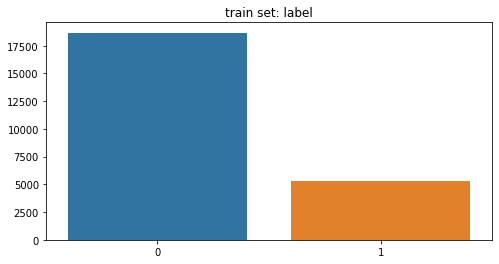

In [7]:
plot_categorical(trainset, target, title='train set: label')

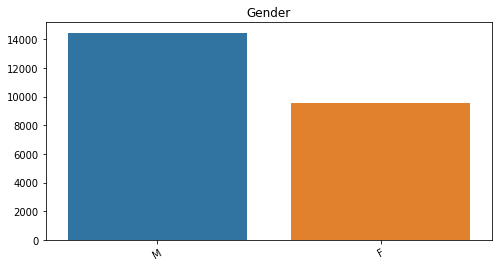

In [12]:
plot_categorical(data=trainset_2, col='Gender', xlabel_angle=30, title='Gender')

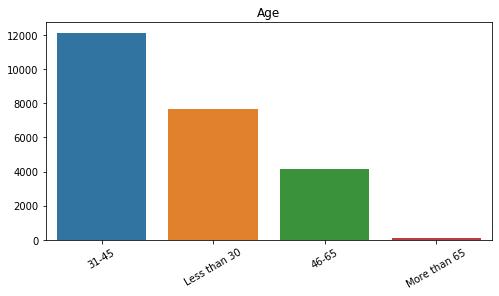

In [13]:
plot_categorical(data=trainset_2, col='AGE', xlabel_angle=30, title='Age')

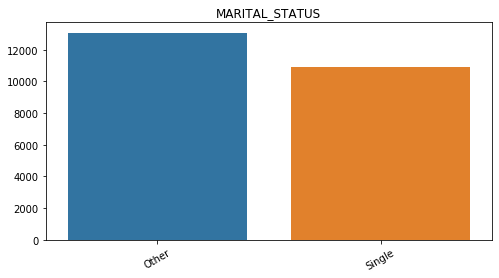

In [15]:
plot_categorical(data=trainset_2, col='MARITAL_STATUS', xlabel_angle=30, title='MARITAL_STATUS')

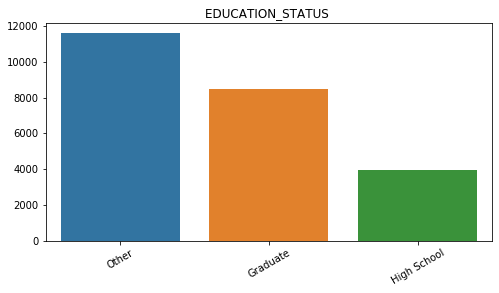

In [14]:
plot_categorical(data=trainset_2, col='EDUCATION_STATUS', xlabel_angle=30, title='EDUCATION_STATUS ')

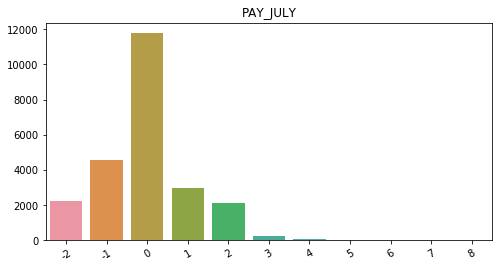

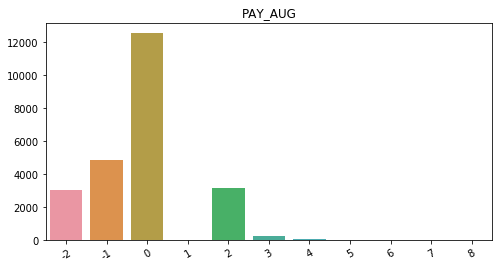

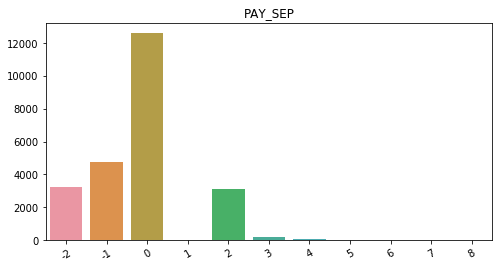

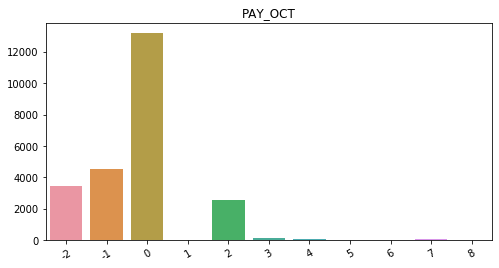

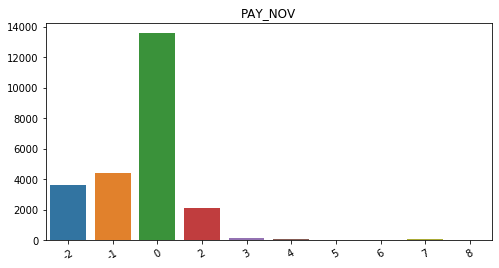

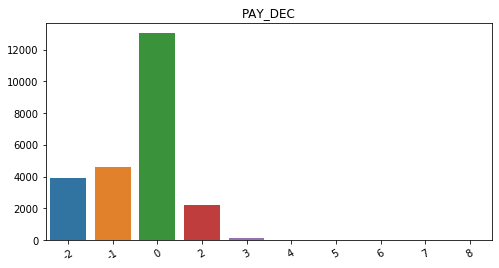

In [29]:
for item in Pay:
    plot_categorical(data=trainset_2, col=item, xlabel_angle=30, title=item)

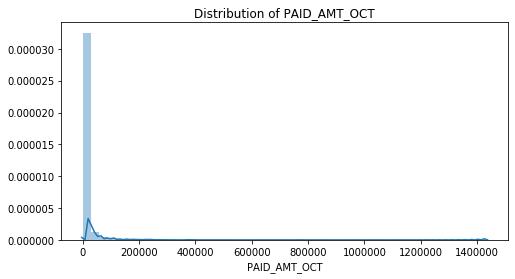

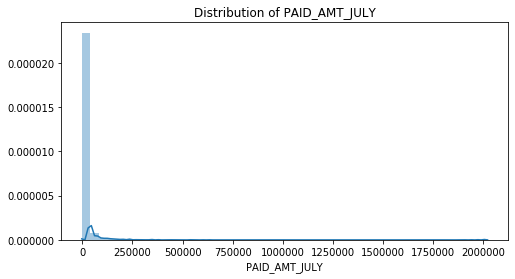

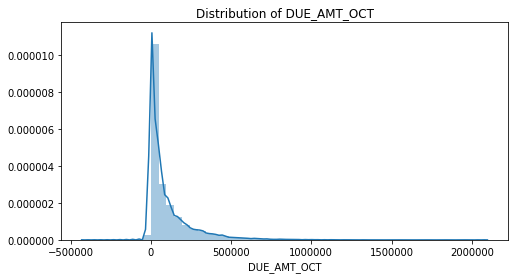

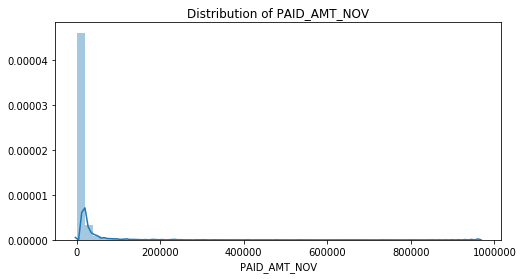

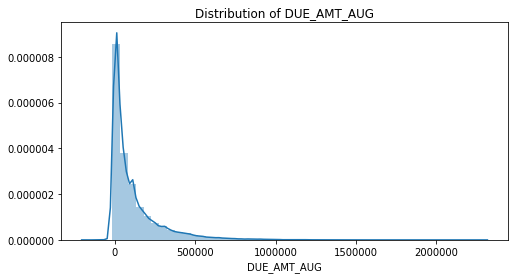

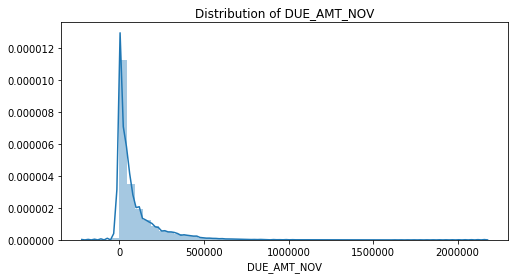

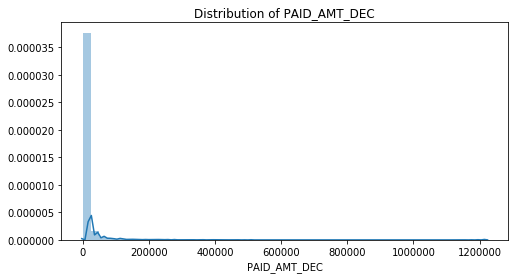

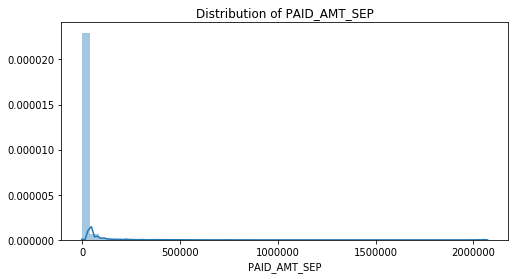

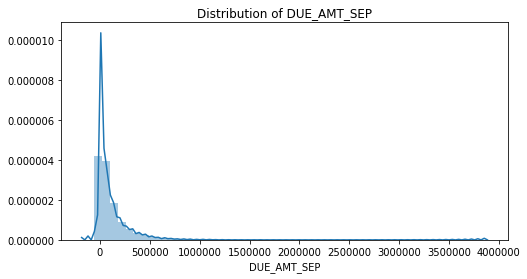

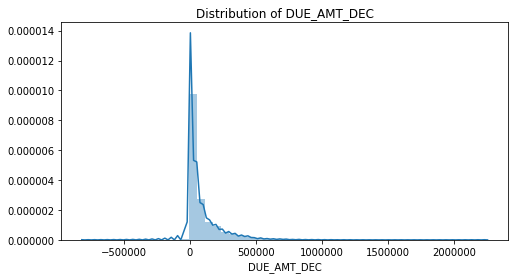

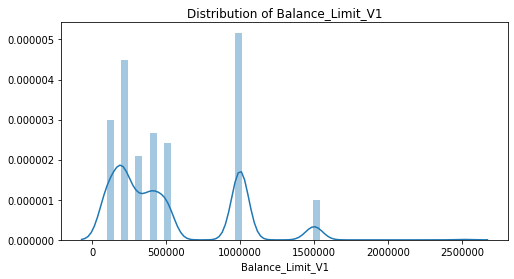

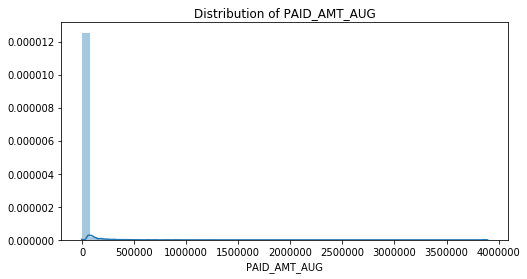

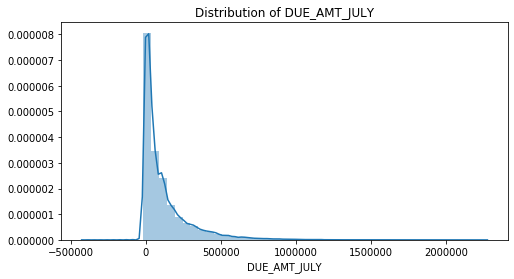

In [26]:
for item in numerical:
    plot_numerical(trainset, item)

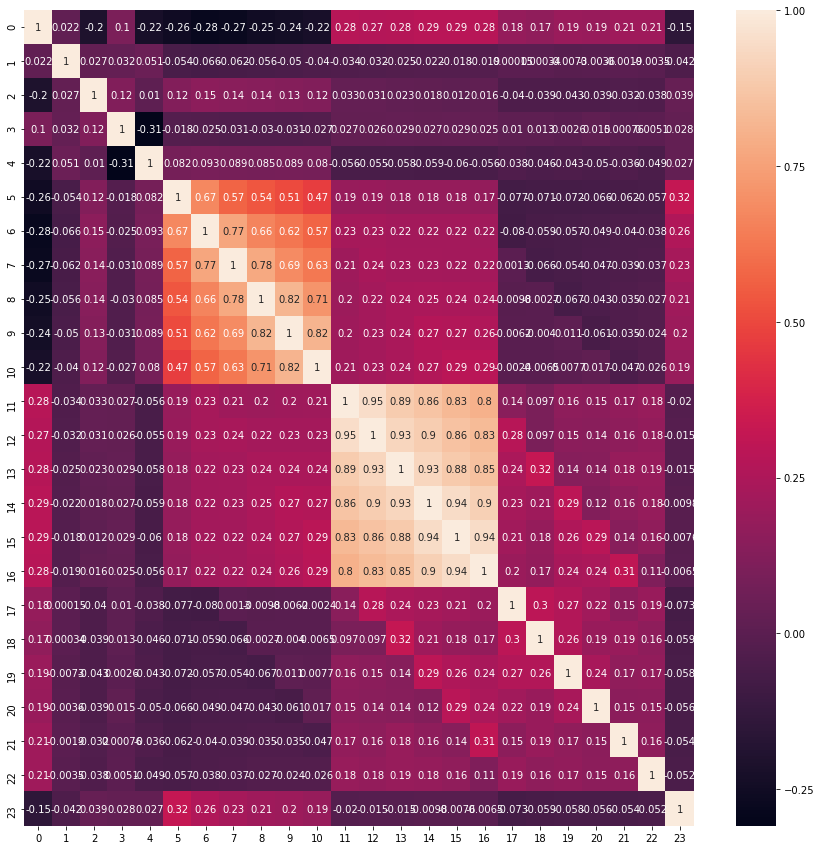

In [31]:
corr_mat = trainset.corr()
plt.figure(figsize=[15, 15])
sns.heatmap(corr_mat.values, annot=True)
plt.show()